In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [23]:
b=pd.read_csv('crimes.csv')
b.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Unnamed: 16
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51,NaN
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618,NaN
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350,NaN
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868,NaN
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936,NaN


In [24]:
b['Group_Name'].unique()

array(['Rape', 'Kidnapping & Abduction - Women & Girls', 'Dowry Deaths',
       'Molestation', 'Sexual harassment',
       'Cruelty by Husband and Relatives', 'Importation of Girls',
       'Immoral Traffic (Prevention) Act', 'Dowry Prohibition Act',
       'Indecent Representation of Women (Prohibition) Act',
       'Sati Prevention Act', 'Total Crime Against Women'], dtype=object)

In [25]:
b.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Persons_Acquitted',
       'Persons_against_whom_cases_Compounded_or_Withdrawn',
       'Persons_Arrested', 'Persons_Chargesheeted', 'Persons_Convicted',
       'Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning',
       'Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end',
       'Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End',
       'Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason',
       'Persons_Trial_Completed', 'Persons_under_Trial_at_Year_beginning',
       'Total_Persons_under_Trial', 'Unnamed: 16'],
      dtype='object')

In [28]:
b=b.where(b['Group_Name']=='Total Crime Against Women').dropna(how='all')
b=b.where(b['Year']==2010).dropna(how='all')
b=b[['Area_Name','Year','Group_Name','Total_Persons_under_Trial']]
b.head()

,Area_Name,Year,Group_Name,Total_Persons_under_Trial
4130,Andaman & Nicobar Islands,2010.0,Total Crime Against Women,606.0
4131,Andhra Pradesh,2010.0,Total Crime Against Women,95666.0
4132,Arunachal Pradesh,2010.0,Total Crime Against Women,1652.0
4133,Assam,2010.0,Total Crime Against Women,23907.0
4134,Bihar,2010.0,Total Crime Against Women,67721.0


In [5]:
l=pd.read_excel('popdata.xlsx')
l.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,32,Andaman and Nicobar Islands,380581,0.0686,8249,46,876,86.63
1,5,Andhra Pradesh,84580777,0.1098,275045,308,993,67.02
2,27,Arunachal Pradesh,1383727,0.2603,83743,17,938,65.38
3,14,Assam,31205576,0.1707,78438,398,958,72.19
4,3,Bihar,104099452,0.2542,94163,1106,918,61.80


In [6]:
l=l.replace('Andaman and Nicobar Islands','Andaman & Nicobar Islands')
l=l.replace('Dadra and Nagar Haveli','Dadra & Nagar Haveli')
l=l.replace('Daman and Diu','Daman & Diu')
l=l.replace('Orissa','Odisha')
l=l.replace('Jammu and Kashmir','Jammu & Kashmir')
l=l.drop([14])

In [7]:
l=l.merge(b,left_on='State',right_on='Area_Name')

In [9]:
l['Total crimes per capita']=l['Total_Persons_under_Trial']/l['Population']

In [30]:
l.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Area_Name,Year,Group_Name,Total_Persons_under_Trial,Total crimes per capita
0,32,Andaman & Nicobar Islands,380581,0.0686,8249,46,876,86.63,Andaman & Nicobar Islands,2010.0,Total Crime Against Women,606.0,0.001592
1,5,Andhra Pradesh,84580777,0.1098,275045,308,993,67.02,Andhra Pradesh,2010.0,Total Crime Against Women,95666.0,0.001131
2,27,Arunachal Pradesh,1383727,0.2603,83743,17,938,65.38,Arunachal Pradesh,2010.0,Total Crime Against Women,1652.0,0.001194
3,14,Assam,31205576,0.1707,78438,398,958,72.19,Assam,2010.0,Total Crime Against Women,23907.0,0.000766
4,3,Bihar,104099452,0.2542,94163,1106,918,61.80,Bihar,2010.0,Total Crime Against Women,67721.0,0.000651


<IPython.core.display.Javascript object>


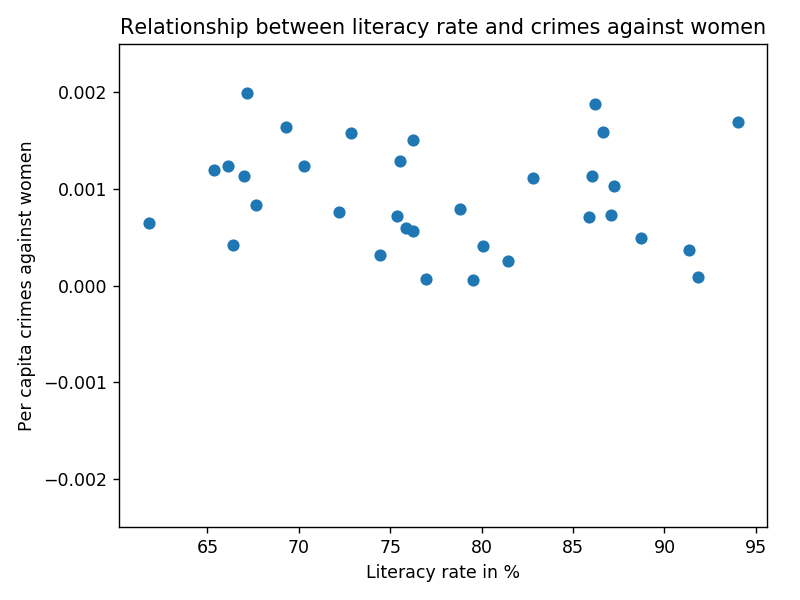

In [31]:
fig=plt.figure()
plt.scatter(l['Literacy'],l['Total crimes per capita'])
plt.gca().set_xlabel('Literacy rate in %')
plt.gca().set_ylabel('Per capita crimes against women')
plt.gca().set_title('Relationship between literacy rate and crimes against women')
plt.ylim(-0.0025,0.0025)
plt.tight_layout()
plt.savefig('week4scatter.png')

In [12]:
# m=bb['Literacy']
# n=bb['Total crimes per capita']
# m.corr(n)
# m.corr(n, method='spearman')
# m.corr(n,method='kendall')

<IPython.core.display.Javascript object>


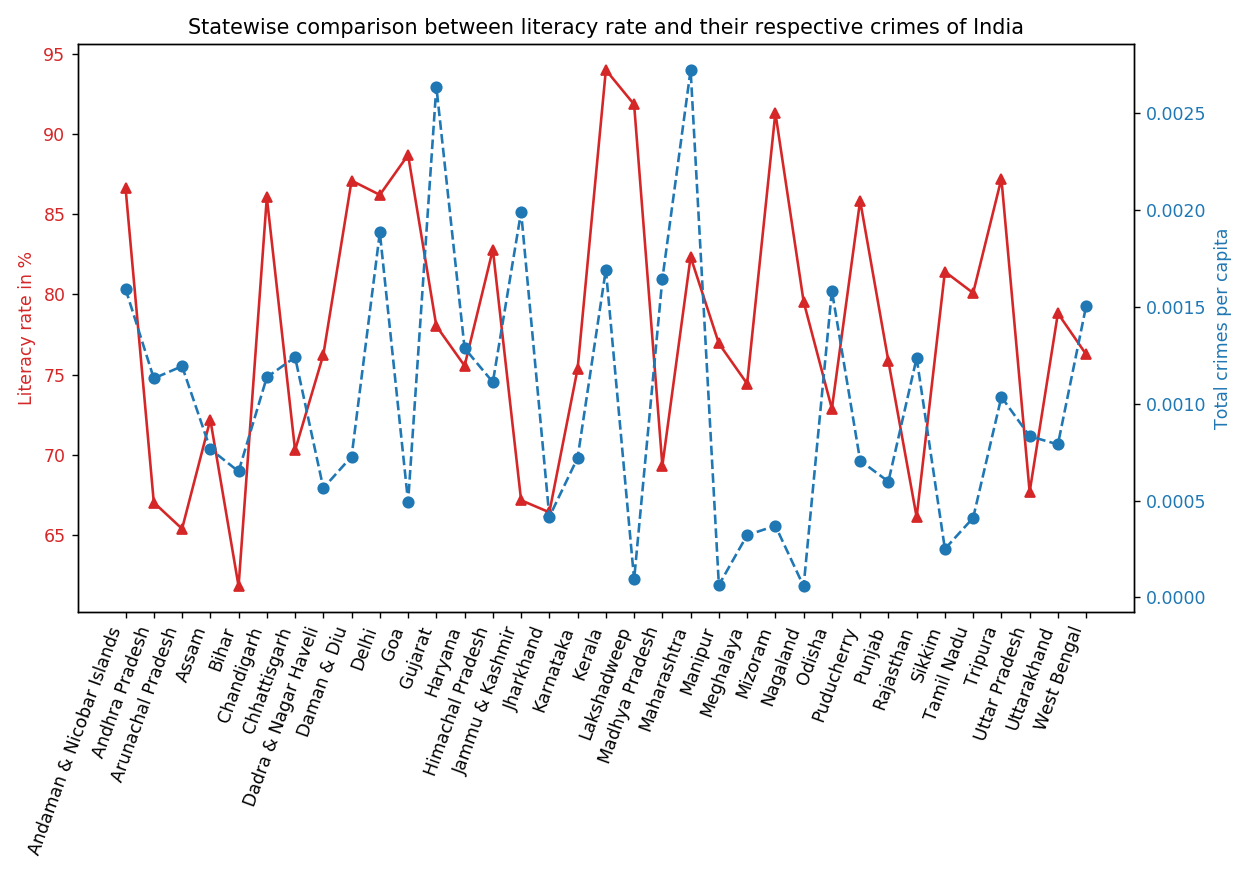

In [16]:
fig=plt.figure(figsize=(10,7))
x=list(l['State'])
color = 'tab:red'
plt.plot(x,l['Literacy'],color=color,marker='^',)
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_ylabel('Literacy rate in %',color=color)
plt.xticks(rotation=70)
plt.gca().set_xticklabels(x, ha='right')
ax2 = plt.gca().twinx()
color = 'tab:blue'
plt.plot(x,l['Total crimes per capita'],color=color,marker='o',ls='--')
plt.gca().set_ylabel('Total crimes per capita',color=color)
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_title('Statewise comparison between literacy rate and their respective crimes of India')
plt.tight_layout()
plt.show()
plt.savefig('week4.png')